## Movie analysis

**Importing modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

sns.set()

%matplotlib inline

**Loading and getting to know the dataset**

In [3]:
dataset = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
dataset.head()

budget                                 company country        director  \
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000.0                      Paramount Pictures     USA     John Hughes   
2  15000000.0                      Paramount Pictures     USA      Tony Scott   
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000.0                    Walt Disney Pictures     USA  Randal Kleiser   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
2     Action  179800601.0                   Top Gun     PG  1986-05-16   
3     Action   85160248.0                    Aliens      R  1986-07-18   
4  Adventure   18564613.0   Flight of the Navigator     PG  1986-08-01   

   runtime  score               star   votes         writer  year  
0       89    8.1        Wil Wheaton  299174   Stephen King  1986  
1      103    7.8  Matthew Broderick  264740    John Hughes  1986  
2      110    6.9         Tom Cruise  236909       Jim Cash  1986  
3      137    8.4   Sigourney Weaver  540152  James Cameron  1986  
4       90    6.9        Joey Cramer   36636  Mark H. Baker  1986

**The set has:**

   - Numerical columns: Budget, Gross, Runtime, Score and Votes.
   - Categorical columns: Company, Country, Director, Genre, Name, Rating, Star and Writer.
   - Date columns: Released and Year.

**Missing values?**

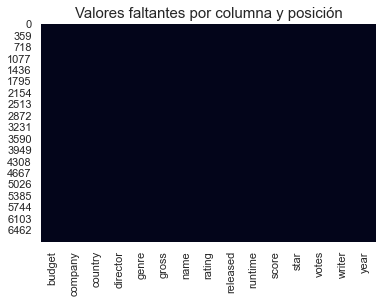

In [4]:
sns.heatmap(dataset.isnull(), cbar=False) 
plt.title('Valores faltantes por columna y posición', fontsize = 15)
plt.show()

*There are no missing values in the set*

**Numerical features description**

In [5]:
dataset.describe().T

count          mean           std     min         25%         50%  \
budget   6820.0  2.458113e+07  3.702254e+07     0.0        0.00  11000000.0   
gross    6820.0  3.349783e+07  5.819760e+07    70.0  1515839.00  12135679.0   
runtime  6820.0  1.065513e+02  1.802818e+01    50.0       95.00       102.0   
score    6820.0  6.374897e+00  1.003142e+00     1.5        5.80         6.4   
votes    6820.0  7.121952e+04  1.305176e+05    27.0     7665.25     25892.5   
year     6820.0  2.001000e+03  8.944501e+00  1986.0     1993.00      2001.0   

                 75%          max  
budget   32000000.00  300000000.0  
gross    40065340.50  936662225.0  
runtime       115.00        366.0  
score           7.10          9.3  
votes       75812.25    1861666.0  
year         2009.00       2016.0

Some conclusions:
- El set has 6820 titles.
- The studied time lapse goes from 1986 to 2016.
- The average film duration is 1h 46min.

**How many films there are in the set per year?**

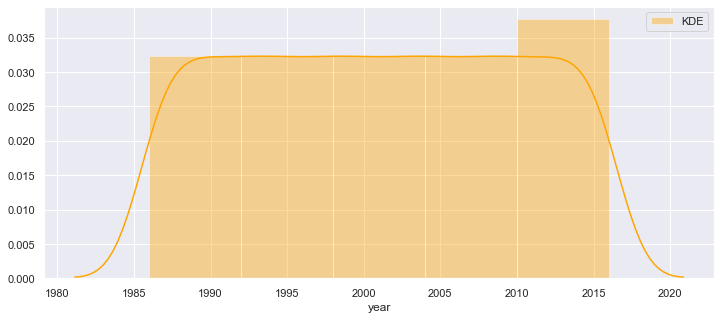

In [6]:
sns.distplot(dataset['year'], bins = 5, color = 'orange', label = 'KDE')
plt.legend()
plt.gcf().set_size_inches(12, 5)

*It seems there are the same amounts of movies studied per each year!*

**Seeing the oldest and newest movies in the set**

*Oldest released movies*

In [7]:
Oldest = dataset.sort_values("released", ascending = True)
Oldest[['name', "released"]][:10]

name    released
96           Black Moon Rising  1986-01-10
195               The Longshot  1986-01-17
47                       Troll  1986-01-17
27                  Iron Eagle  1986-01-17
218      Heathcliff: The Movie  1986-01-17
161            The Boy in Blue  1986-01-17
67   The Clan of the Cave Bear  1986-01-17
144               My Chauffeur  1986-01-24
97           The Best of Times  1986-01-31
127                      Power  1986-01-31

*Newest released movies*

In [8]:
Newest = dataset.sort_values("released", ascending = False)
Newest[['name', "released"]][:10]

name    released
6545                  Manifesto  2017-11-23
6651                      Leap!  2017-08-25
6744                     Maudie  2017-08-04
6668             Paris Can Wait  2017-08-03
6819  From the Land of the Moon  2017-07-28
6725                   Paterson  2017-07-27
6706               Lady Macbeth  2017-07-14
6600              The Bad Batch  2017-06-23
6662        Ella es un monstruo  2017-06-16
6773            I, Daniel Blake  2017-06-09

**10 countries with most released films**

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Loading gpd file
world.head(3)

pop_est continent       name iso_a3  gdp_md_est  \
0    920938   Oceania       Fiji    FJI      8374.0   
1  53950935    Africa   Tanzania    TZA    150600.0   
2    603253    Africa  W. Sahara    ESH       906.5   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...

**Country names in my dataset**

In [10]:
country_geo = list(world['name']) # Countries in 'naturalearth_lowres' 
country_data = list(dataset['country'].unique()) # Countries in my dataset

country_diff = [country for country in country_data if country not in country_geo]
country_diff # Countries with different names

['USA',
 'UK',
 'West Germany',
 'Hong Kong',
 'Soviet Union',
 'Republic of Macedonia',
 'Federal Republic of Yugoslavia',
 'Aruba',
 'Czech Republic',
 'Malta']

In [11]:
dataset['country'] = pd.DataFrame(dataset['country'].replace(
    {'USA':'United States of America','UK':'United Kingdom',
     'West Germany':'Germany', 'Hong Kong':'China',
     'Soviet Union': 'Russia', 'Czech Republic':'Czech Rep.'})) # Changing country name from my dataset

**Countries with the most released films**

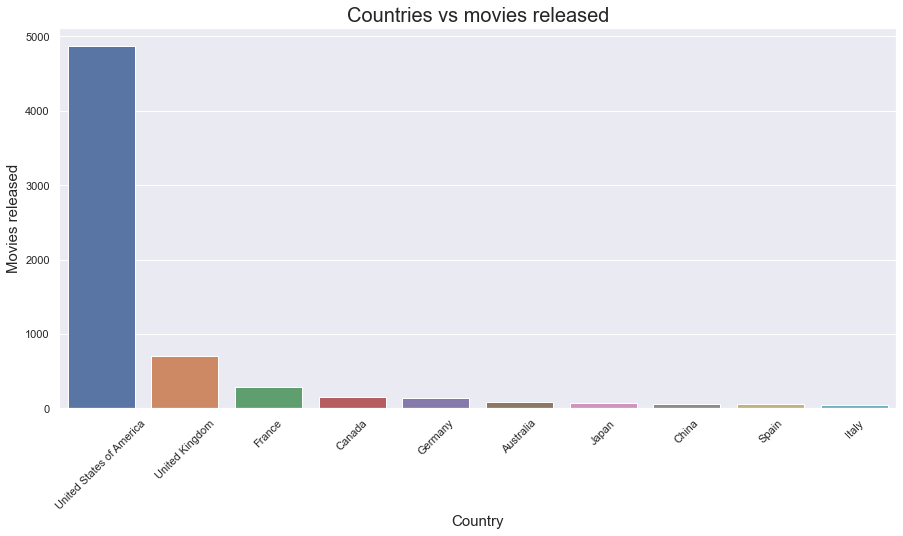

In [12]:
Countries = pd.DataFrame(dataset['country'].value_counts())
Ten_countries = pd.DataFrame(dataset['country'].value_counts()).head(10)

sns.barplot(x = Ten_countries.index, y = Ten_countries['country'])

labels =Ten_countries.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Countries vs movies released', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')
plt.show()

**Geographic plot**

In [13]:
Temp = Countries.index.to_frame(index=False, name = 'countries')
Temp2 = Countries.reset_index(drop = True)
Temp2 = Temp2.rename(columns={'country': 'Total_movies'})
Temp3 = Temp.join(Temp2)

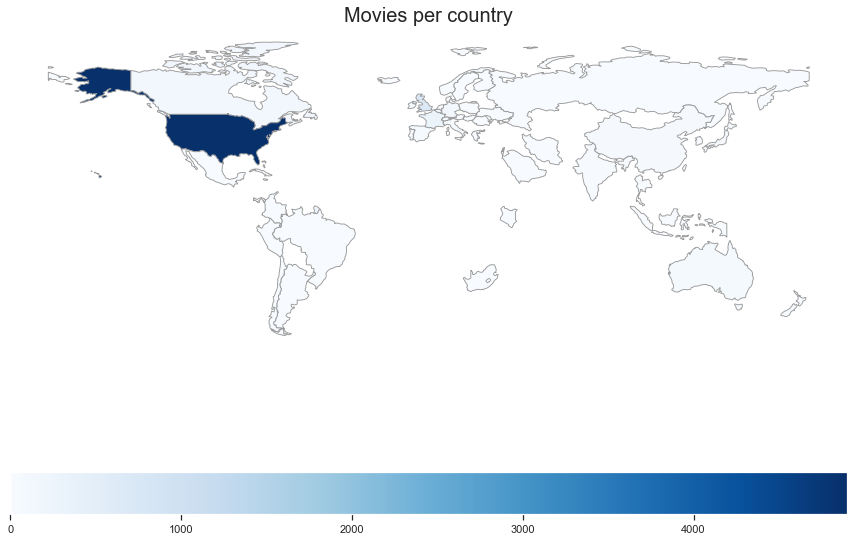

In [14]:
mapped = world.set_index('name').join(Temp3.set_index('countries')).reset_index()

to_be_mapped = 'Total_movies'
vmin, vmax = 0,4900
fig, ax = plt.subplots(1, figsize=(15,15))

mapped.dropna().plot(column=to_be_mapped, cmap='Blues', linewidth=0.9, ax=ax, edgecolors='0.6')
ax.set_title('Movies per country', fontdict={'fontsize':20})
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []

cbar = fig.colorbar(sm, orientation='horizontal')

In [15]:
Per_country = (Countries.sum() / 6820 * 100)
Per_country

country    100.0
dtype: float64

- The 10 countries with most released films concentrate the 94.7% of all the released films in those 30 years.

**Company analisis**

In [16]:
dataset.groupby('company').size()

company
"DIA" Productions GmbH & Co. KG    1
1+2 Seisaku Iinkai                 1
101st Street Films                 1
10th Hole Productions              1
120 Films                          1
                                  ..
Zucker Brothers Productions        1
double A Films                     1
erbp                               1
i5 Films                           1
micro_scope                        1
Length: 2179, dtype: int64

*There are 2179 different companies*

In [17]:
company = dataset['company'].value_counts()
company = pd.DataFrame(company) 
company = company.head(10) 
company.head(3)

company
Universal Pictures      302
Warner Bros.            294
Paramount Pictures      259

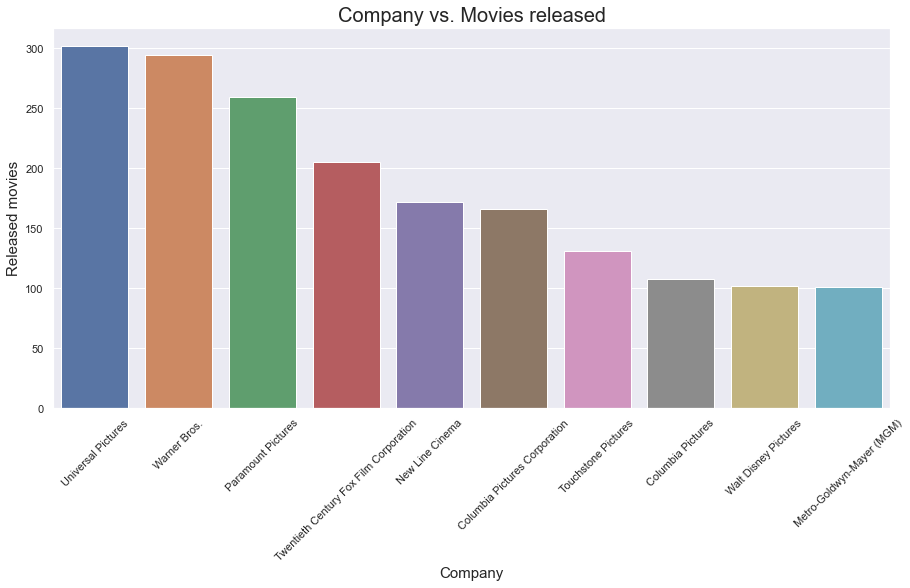

In [18]:
sns.barplot(x = company.index, y = company['company'])

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Company vs. Movies released', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')
plt.show()

In [19]:
Porcentaje = company.sum() / dataset.shape[0] * 100
Porcentaje

company    26.979472
dtype: float64

**Conclusion:**

- The 10 biggest companies around the world concentrate 27% of all the movies released within those 30 years.

**Genre and rating**

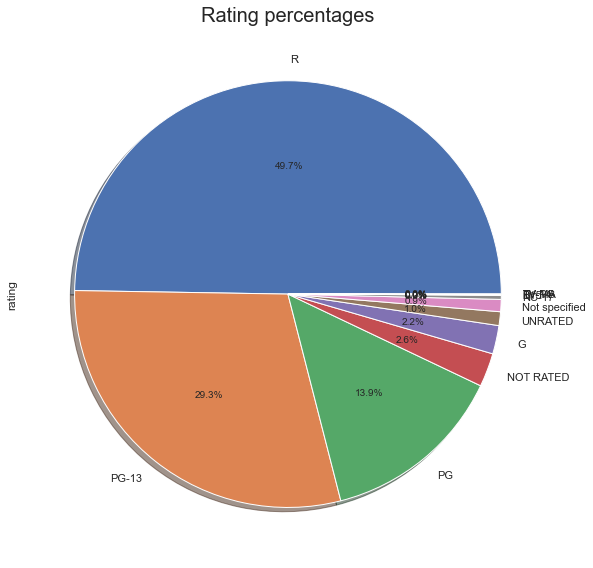

In [20]:
dataset['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Rating percentages', fontsize = 20)
plt.tight_layout()
plt.show()

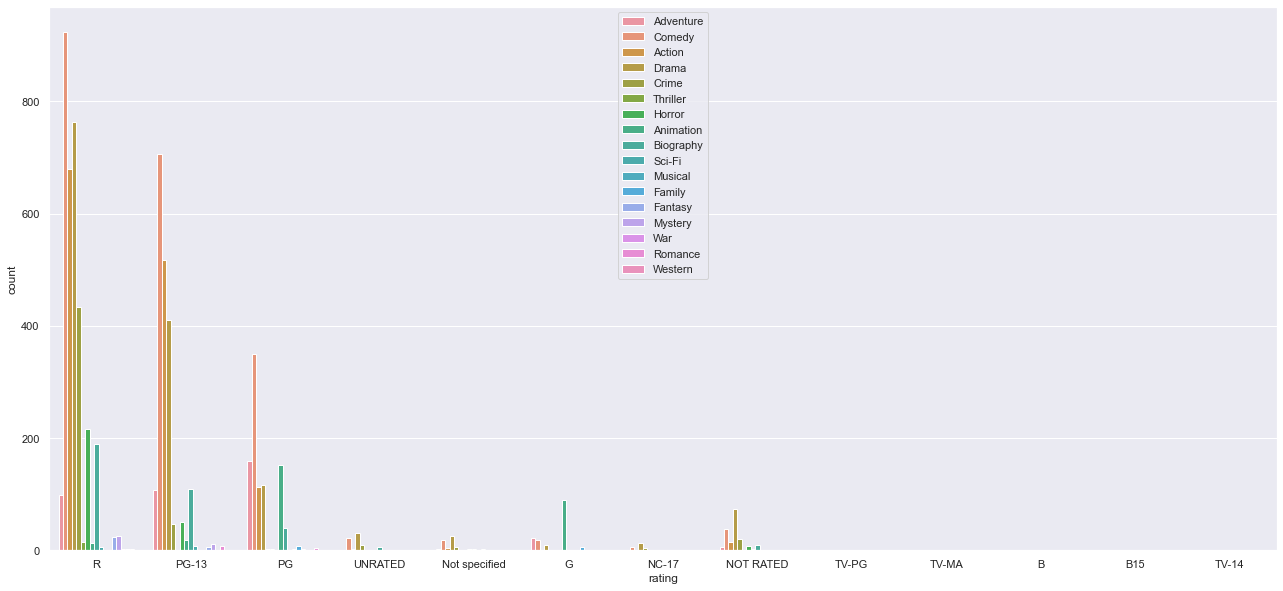

In [21]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'rating',data = dataset ,hue='genre')
plt.legend(loc='upper center')
plt.show()

*Let's see some Adventure films from USA*

In [33]:
tag = "Adventure"
small = dataset[dataset["genre"] == tag]
small[small["country"] == "United States of America"][["name", "country","year"]].head(10)

name                   country  year
0                      Stand by Me  United States of America  1986
4          Flight of the Navigator  United States of America  1986
24   Star Trek IV: The Voyage Home  United States of America  1986
40              The Mosquito Coast  United States of America  1986
51                       SpaceCamp  United States of America  1986
67       The Clan of the Cave Bear  United States of America  1986
157                        Tai-Pan  United States of America  1986
217     Where the River Runs Black  United States of America  1986
220             The Princess Bride  United States of America  1987
227                     Spaceballs  United States of America  1987

**Conclusion:**

   - We can see that most of the movies are R and PG-13 rated, and that most movies are from Adventure, Action and Comedy genres.
   - G rated movies are mostly family ones! (as expected!)

**Correlation analysis**

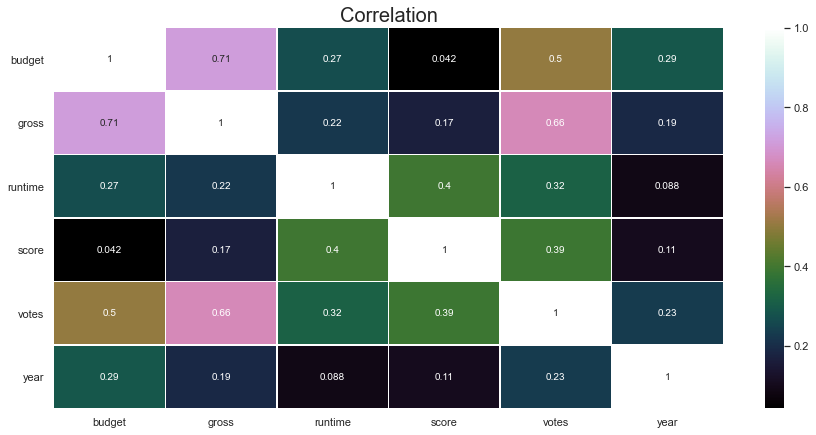

In [22]:
sns.heatmap(dataset.corr(), annot = True, linewidths=.5, cmap='cubehelix')
plt.title('Correlation', fontsize = 20)
plt.gcf().set_size_inches(15, 7)
plt.show()

*There are clear correlation between 'Budget' and 'Gross', and also a relationship between the 'Vote' and 'Gross' variables*

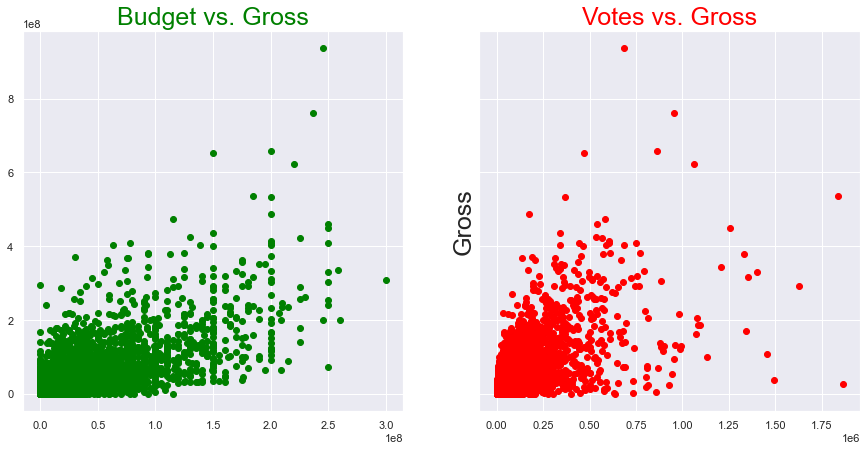

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

plt.gcf().set_size_inches(15, 7)
ax1.scatter(dataset.budget, dataset.gross, c = 'green')
ax1.set_title('Budget vs. Gross', c = 'green', fontsize = 25)
ax2.scatter(dataset.votes, dataset.gross, c='red')
ax2.set_title('Votes vs. Gross', c ='red', fontsize = 25)

plt.ylabel('Gross', fontsize = 25)

plt.show()

**Conclusion:**

- Low budget movies and low voted movies all seem to have poor profit.
- As the budget raises, there is an exponencial tendency for gross improvement.
- There is no clear relation in how much a movie profits from the amount of votes it has.

**Actors and directors**

Let's use some wordclouds to see what happens at the star and director columns!

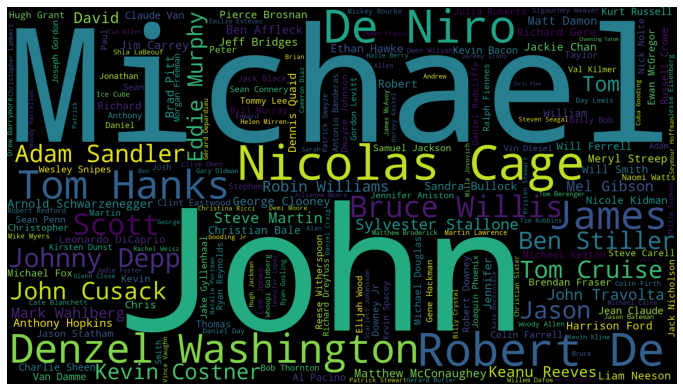

In [24]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dataset.star))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

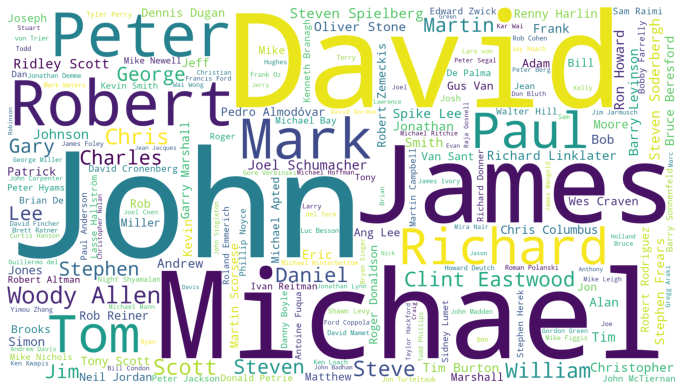

In [25]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dataset.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Let's see how runtime and score are distributed**

*Runtime*

In [31]:
x1 = dataset['runtime'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['Runtime'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Runtime with normal distribution')
fig.show()

*Score*

In [32]:
x2 = dataset['score'].fillna(0.0).astype(float)
fig = ff.create_distplot([x2], ['Score'], bin_size=0.1, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Score with normal distribution')
fig.show()

**Conclusion:**

   - Runtime almost follows a normal distribution around 100 min of duration, but has little skewness to the left.
   - Score values follow a normal distribution, around 6.4.    